In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import sys
sys.path.append("../mpi_scripts/")
from io_utils import collect_results
import os
plt.style.use('../../styles/general.mplstyle')

In [2]:
from loss_utils import calculate_loss

In [3]:
from pypoptim.losses import RMSE

# Load results

In [4]:
case = "210721_131822"
dirname_results = '../../results/ina'
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])

In [8]:
config = result['config'].copy()
sol_best = result['sol_best'].copy()
phenotype_best = result['phenotype_best'].copy()
sol_best

ec_name  g_name     
common   c_p             1.346338
         c_m             1.494668
         a0_m            1.499968
         b0_m            0.187634
         delta_m         2.185517
         s_m             6.200830
         a0_h            0.672328
         b0_h            1.745078
         delta_h         3.155479
         s_h             5.667921
         a0_j            0.252400
         b0_j            0.360264
         delta_j         7.605523
         s_j             0.713832
         tau_j_const     9.605629
         R               0.944729
         R_f             0.605270
         g_max           0.427052
         g_leak          1.175670
         tau_z           0.738616
         v_half_m       18.879107
         v_half_h       84.606565
         k_m             7.848020
         k_h             5.418741
         x_c_comp        0.245941
         x_r_comp        1.053954
         alpha           0.746241
trace    v_off          -1.116026
Name: 0, dtype: float64

In [9]:
# names of genes
m_index = config['runtime']['m_index']
dump_genes = result['dump']['dump']['genes'].reshape((-1, len(m_index)))
n_organisms = config['runtime']['n_organisms']
n_generations = len(dump_genes) // n_organisms
# multiindex (generation, numb_of_organism) 
index = pd.MultiIndex.from_product([range(n_generations), range(n_organisms)],
                                   names=['epoch', 'org'])

dump_genes = pd.DataFrame(dump_genes, columns=m_index, index=index)

dump_loss = result['dump']['dump']['loss'].reshape((n_generations, config['runtime']['n_organisms']))

In [10]:
epochs = []
for k in range(n_generations):
    for l in range(n_organisms):
        epochs.append(k)

No handles with labels found to put in legend.


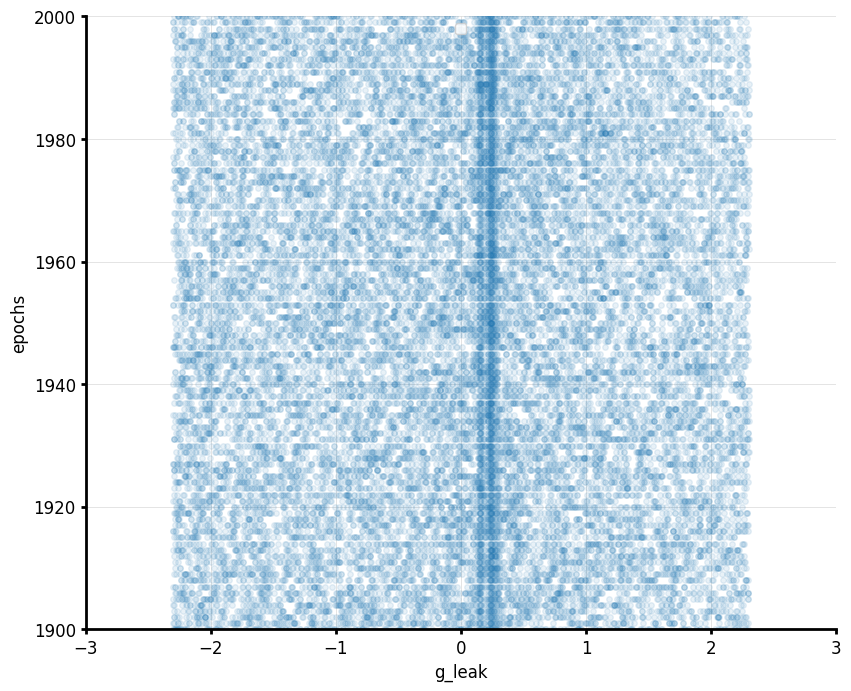

In [13]:
plt.plot(np.log(result['dump']['dump']['genes'][18::28]) , epochs, '.', alpha=0.1)
plt.plot()
plt.xlabel('g_leak')
plt.ylabel('epochs')
#plt.xlim(0,2)
plt.ylim(1900, 2000)
plt.legend()

No handles with labels found to put in legend.


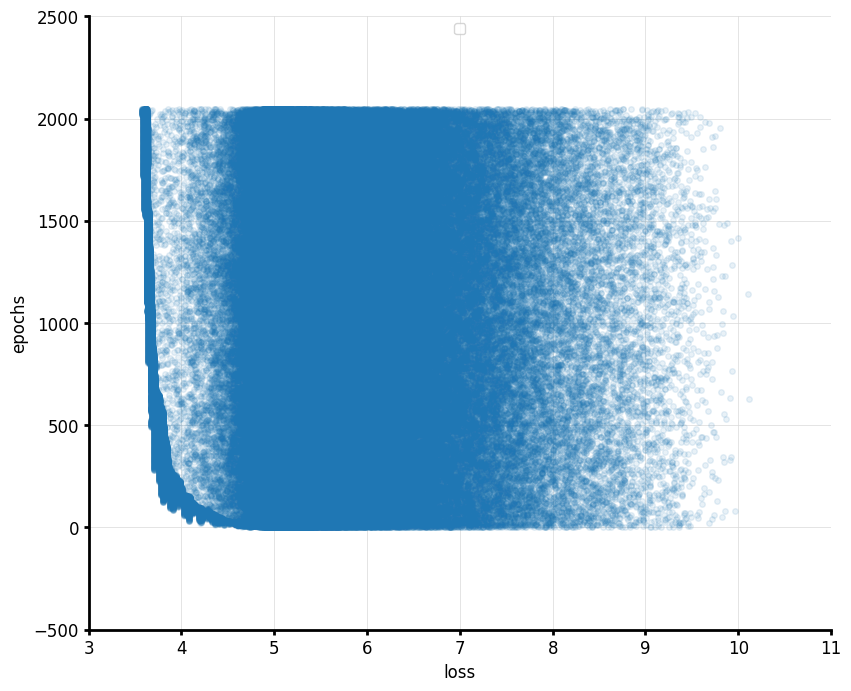

In [14]:
plt.plot(np.log(result['dump']['dump']['loss']) , epochs, '.', alpha=0.1)
plt.plot()
plt.xlabel('loss')
plt.ylabel('epochs')
#plt.xlim(3.5,3.8)
#plt.ylim(500, 600)
plt.legend()

In [15]:
from pypoptim.algorythm.ga import GA
from ina_model import InaModel
from solmodel import SolModel
from pypoptim.algorythm.ga.mutation import cauchy_mutation

In [16]:
import seaborn as sns

In [47]:
config

{'n_organisms': 256,
 'n_elites': 16,
 'n_generations': 5000,
 'output_folder_name': '../../results/ina/',
 'loss': 'RMSE',
 'columns_control': ['I_out'],
 'columns_model': ['I_out'],
 'column_stim_protocol': ['v'],
 'filename_so': '../../src/model_ctypes/ina/ina.so',
 'filename_legend_states': '../../src/model_ctypes/ina/legend_states.csv',
 'filename_legend_constants': '../../src/model_ctypes/ina/legend_constants.csv',
 'filename_legend_algebraic': '../../src/model_ctypes/ina/legend_algebraic.csv',
 'filename_protocol': '../../data/protocols/protocol_trace.csv',
 'filename_initial_state_protocol': '../../data/protocols/protocol_initial_state.csv',
 'experimental_conditions': {'common': {'params': {'c_p': {'bounds': [0.1, 10],
     'gamma': 0.15,
     'is_multiplier': True},
    'c_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': True},
    'a0_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': True},
    'b0_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': Tr

In [40]:
filename_so = "../../src/model_ctypes/ina/ina.so"
# filename_so = config['runtime']['filename_so_abs']
model = InaModel(filename_so)
SolModel.model = model
SolModel.config = config
#config['runtime']['gammas']+=1


In [42]:
dirname = '../../src/model_ctypes/ina/'

C = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')


gammas =  [0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
 0.3  0.3  0.3  0.3  0.3  0.3  1.5  1.5  0.5  0.5  0.15 0.15 0.05 0.5 ]


/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

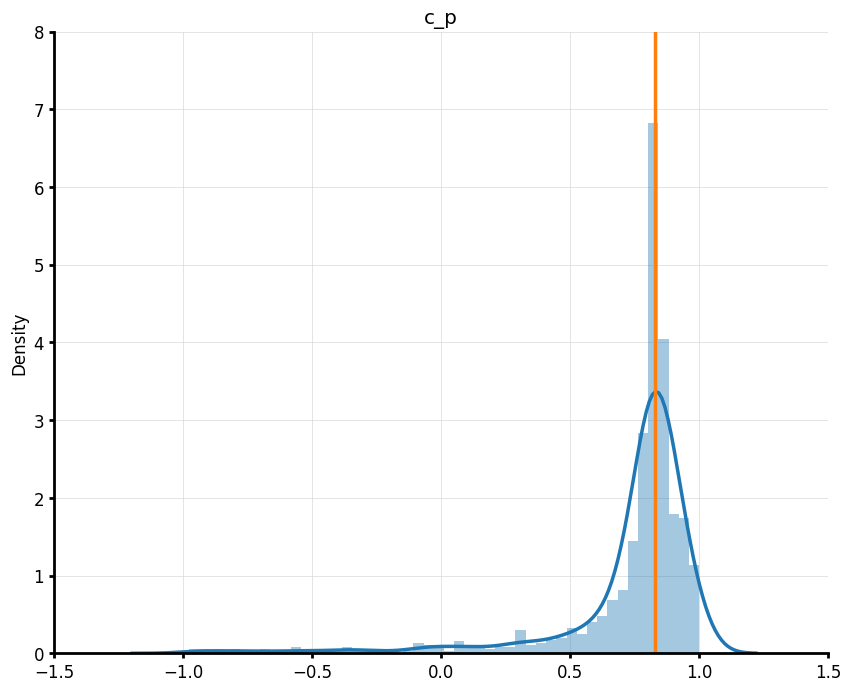

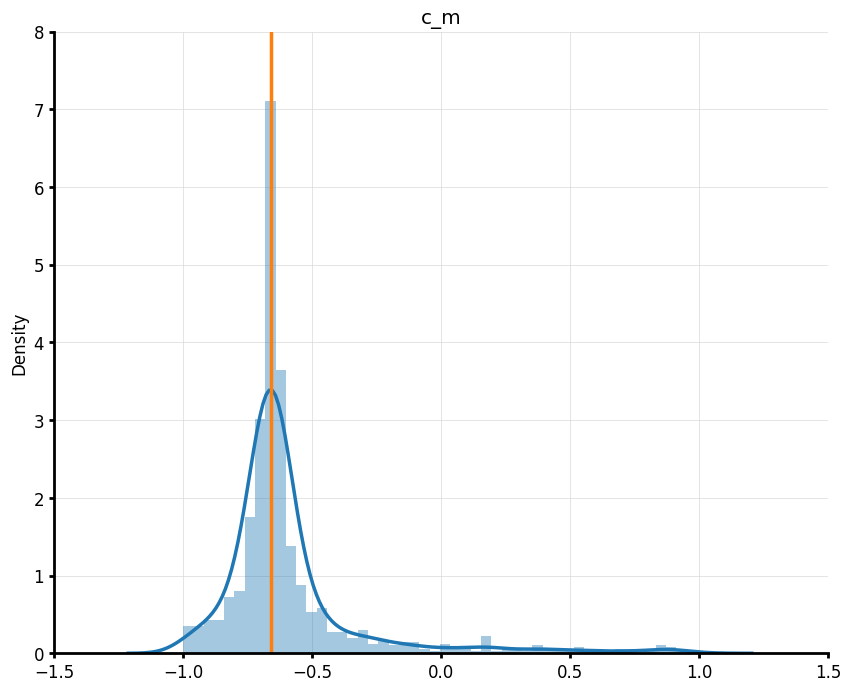

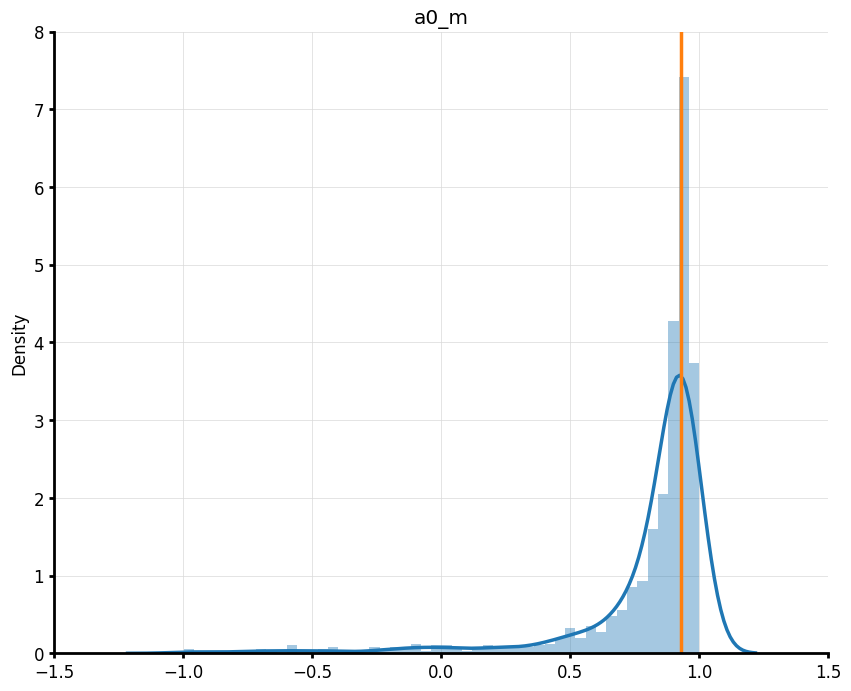

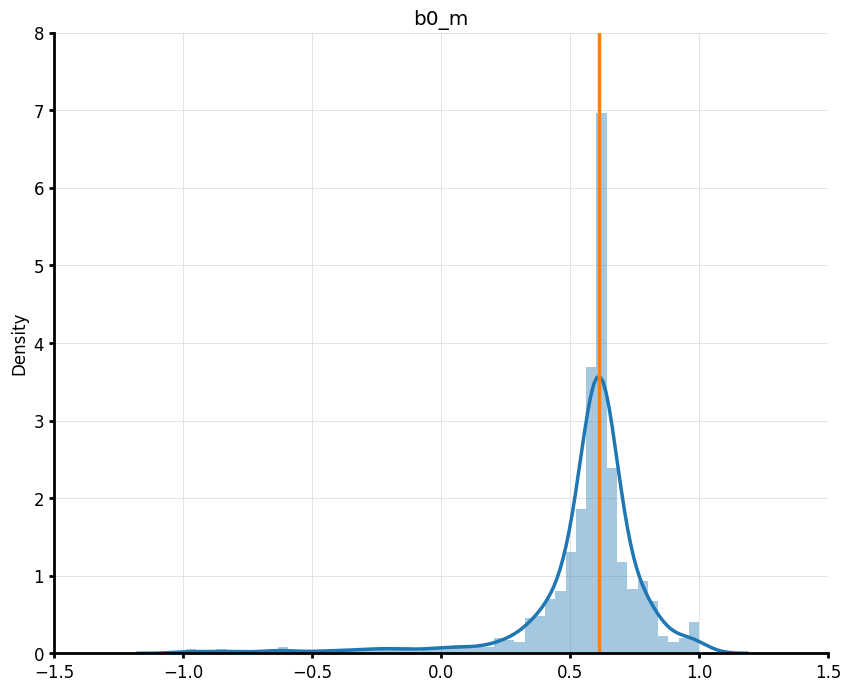

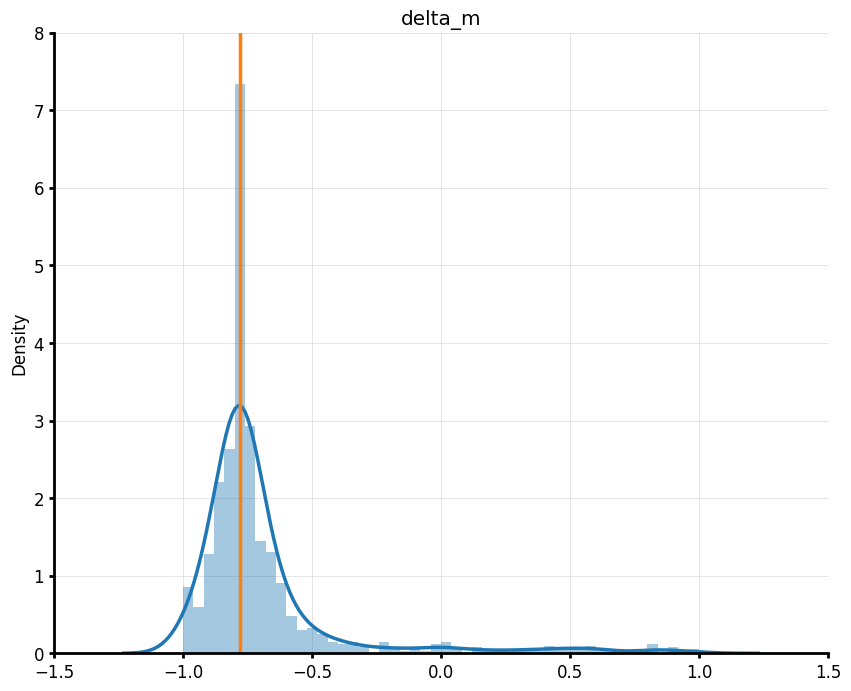

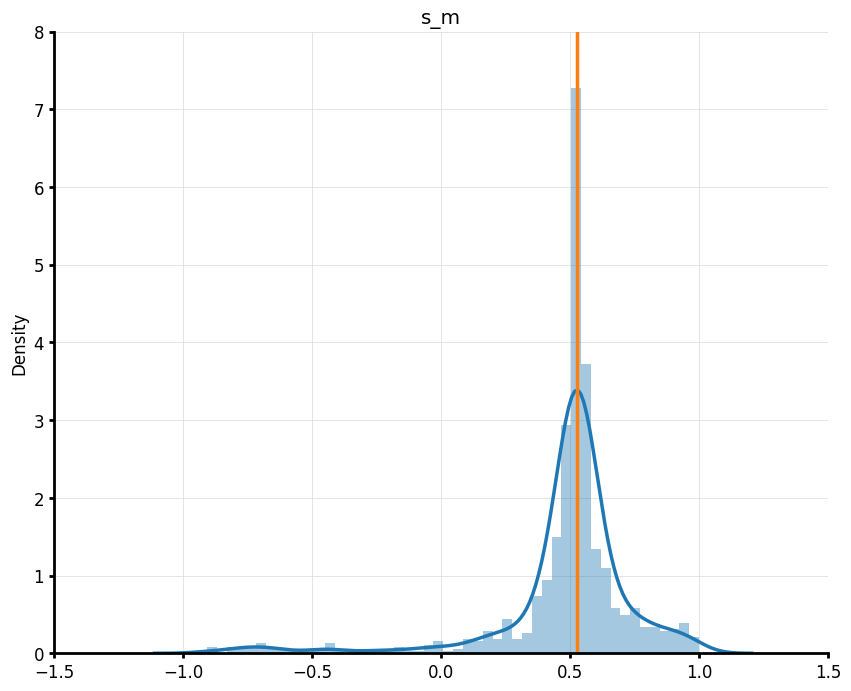

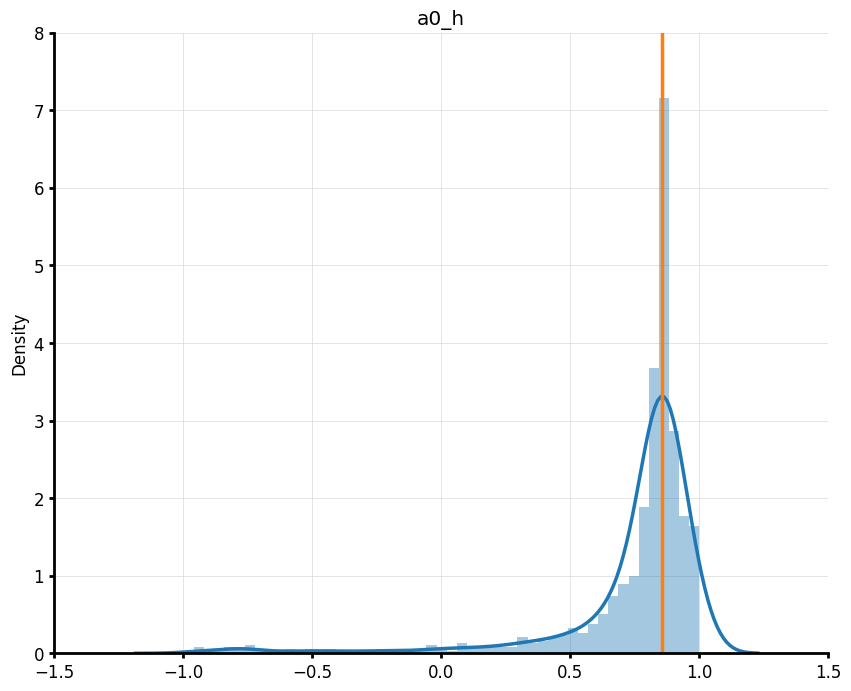

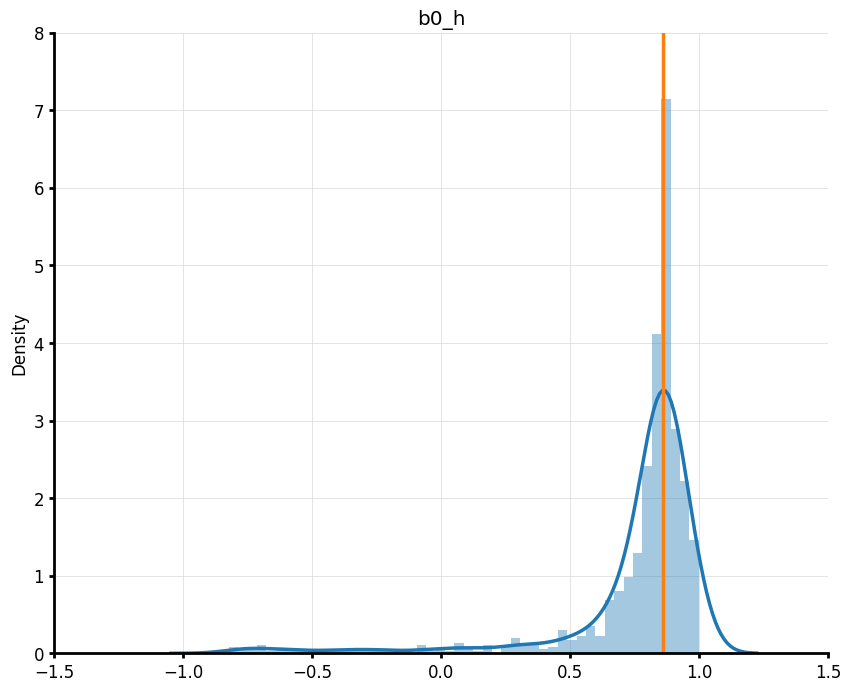

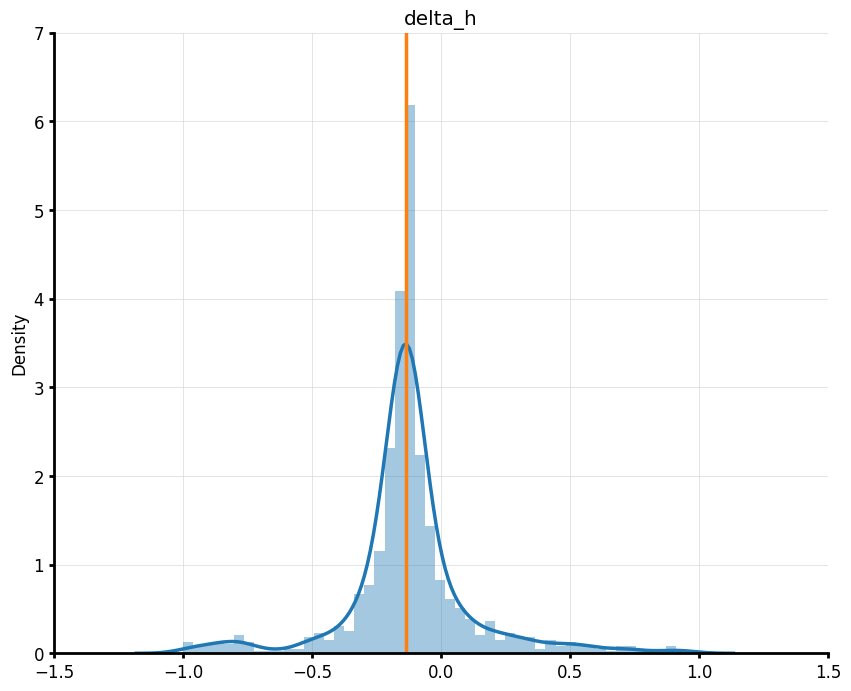

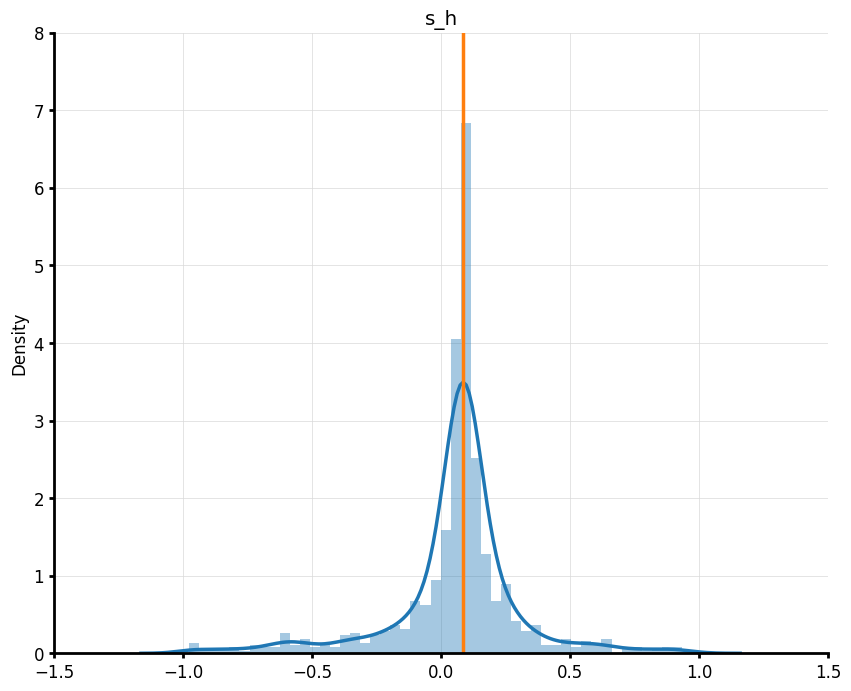

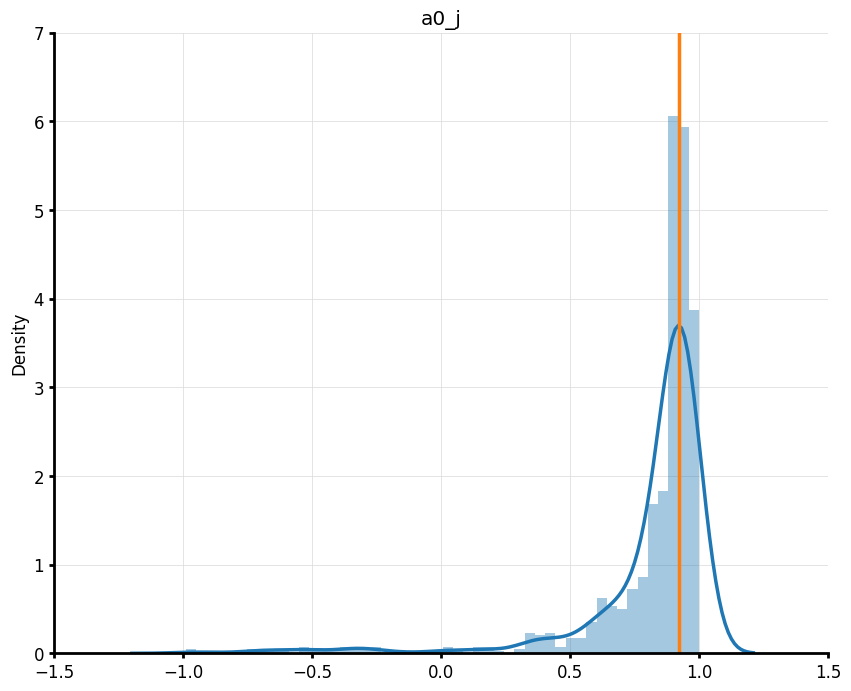

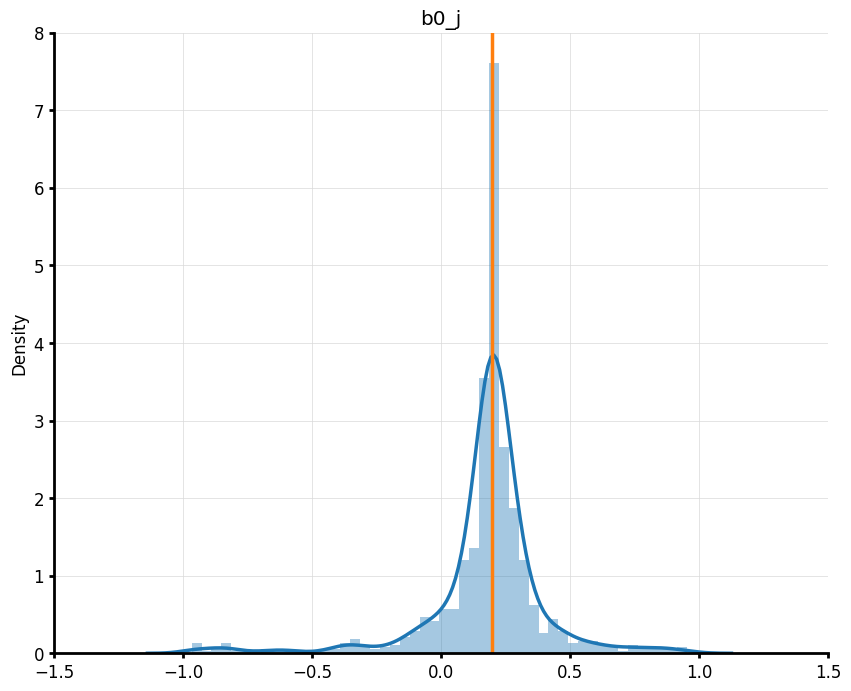

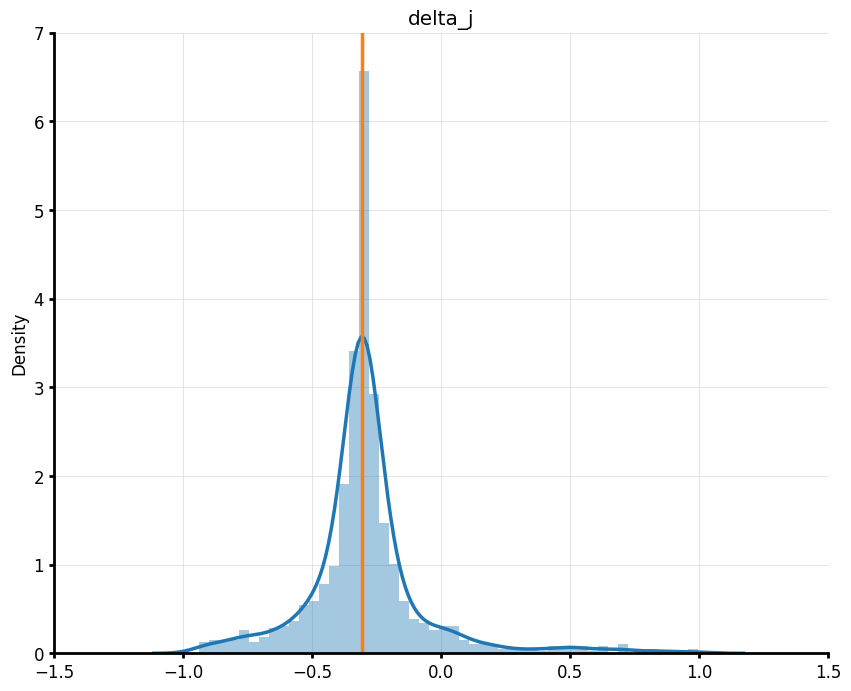

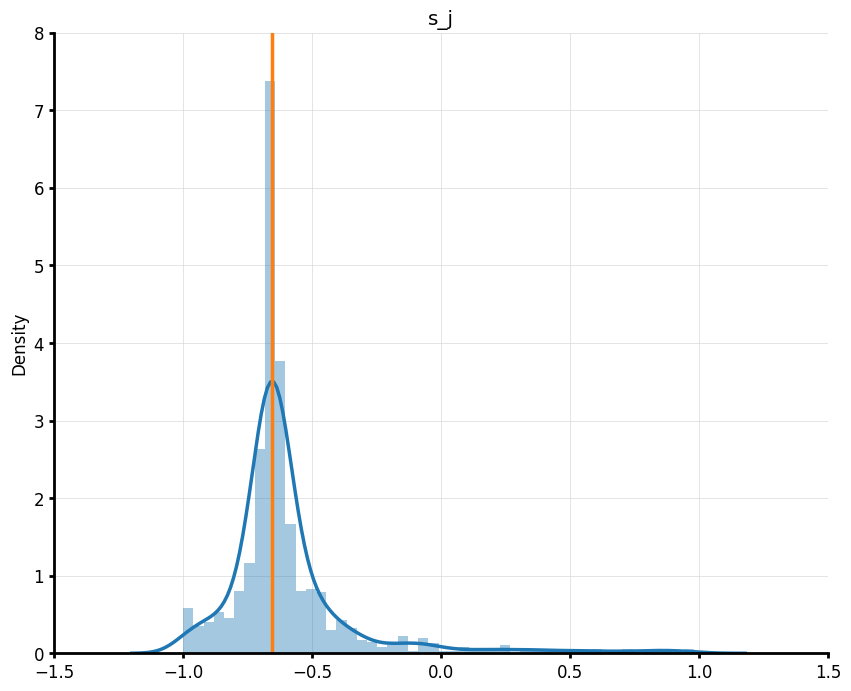

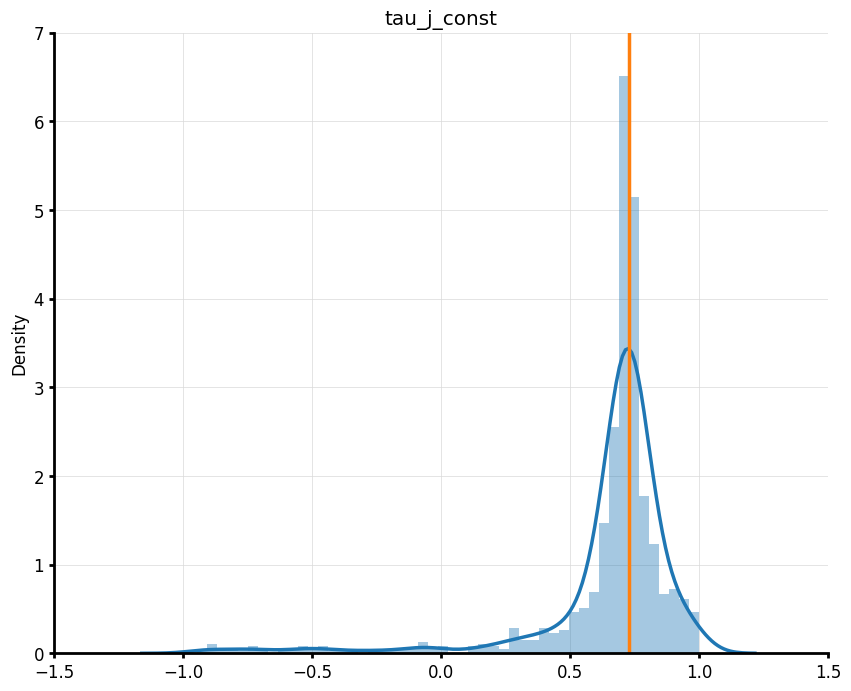

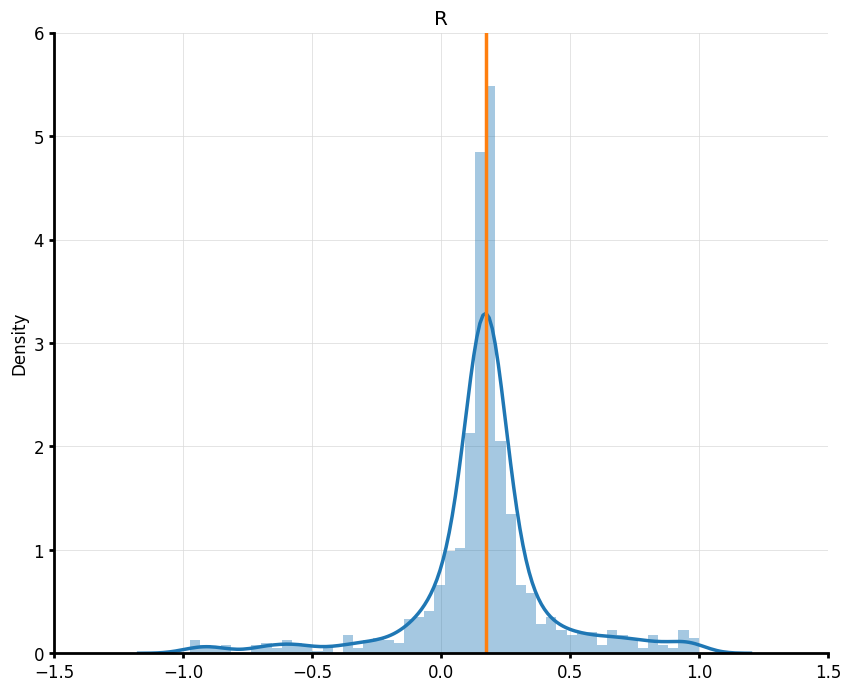

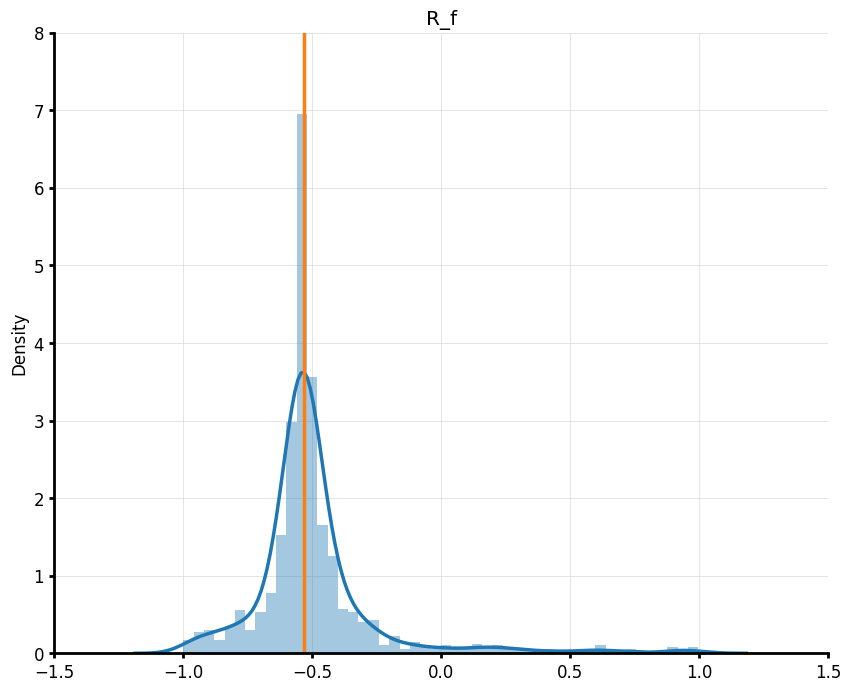

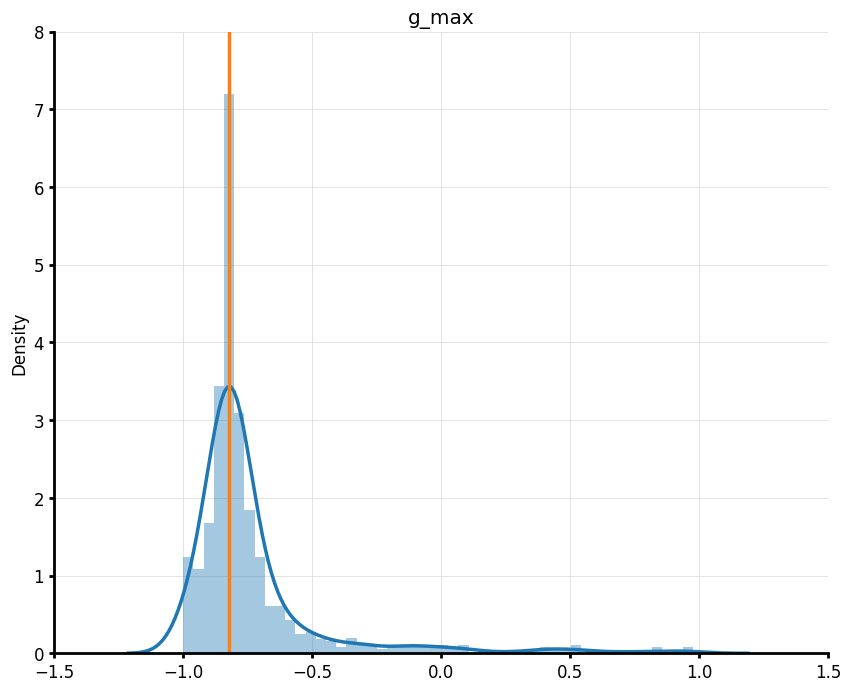

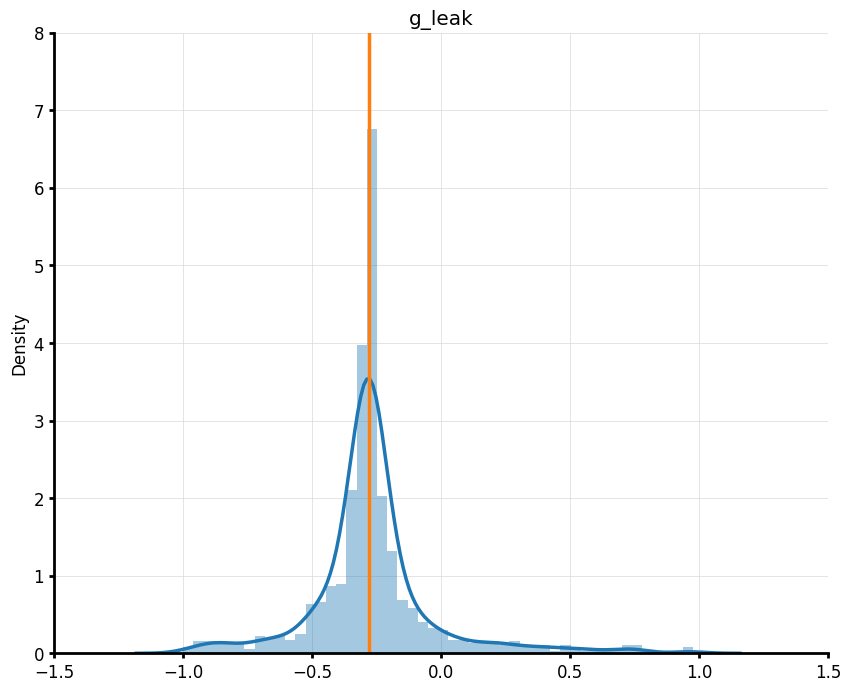

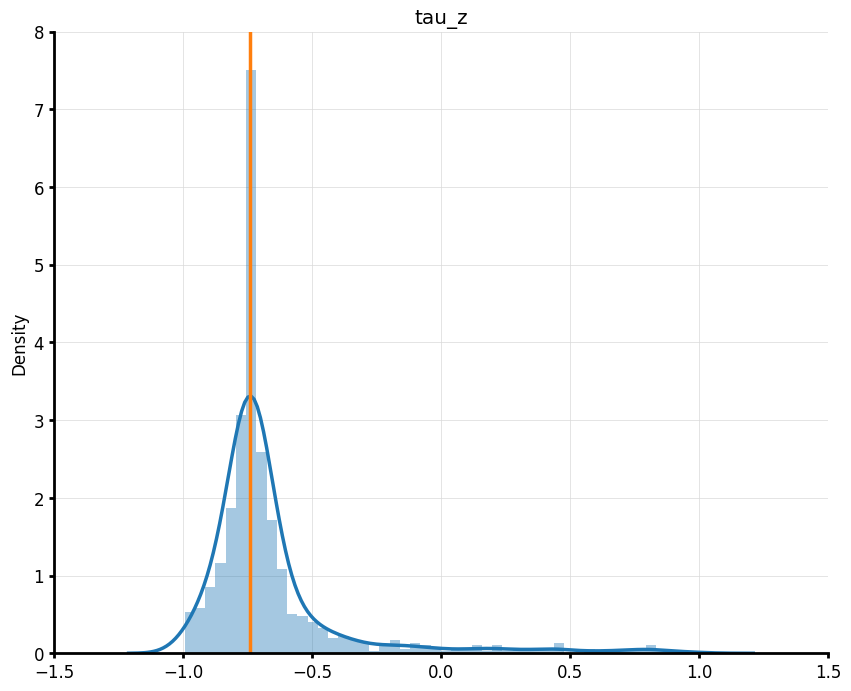

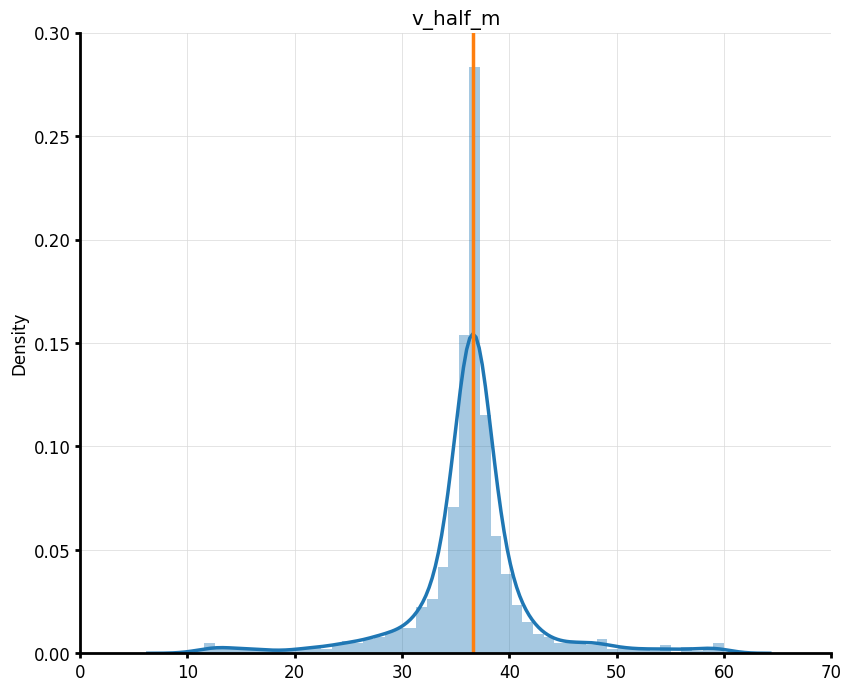

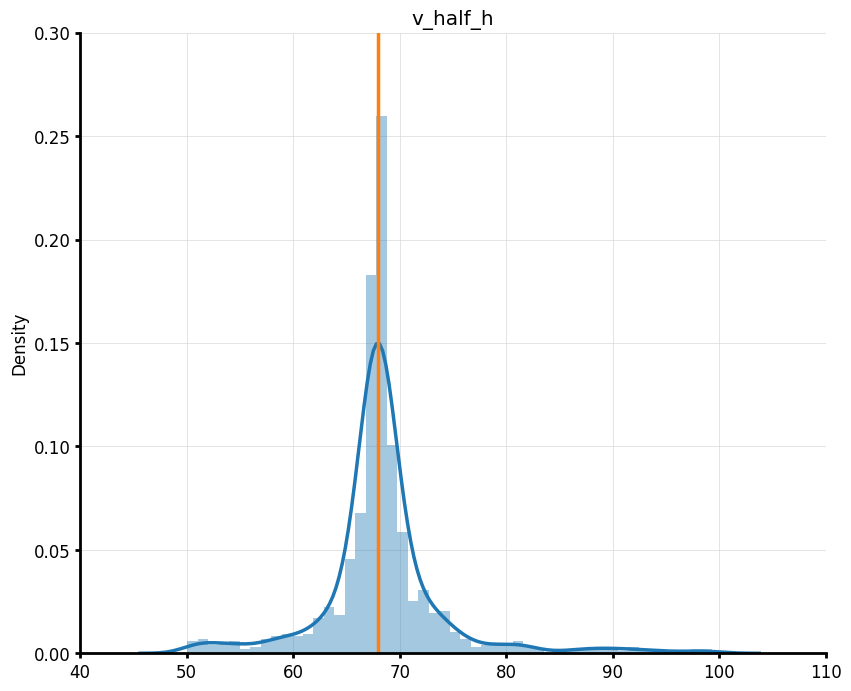

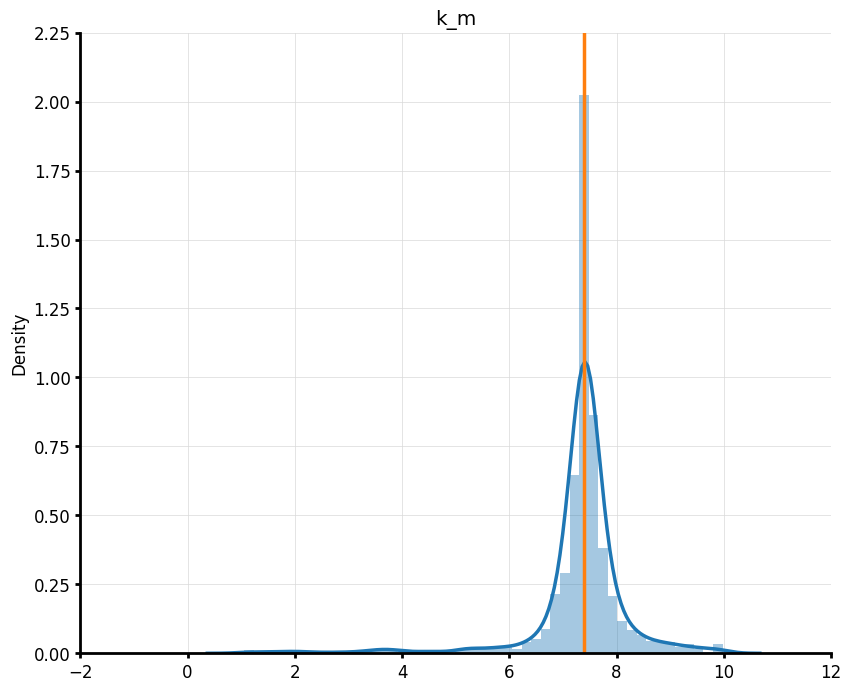

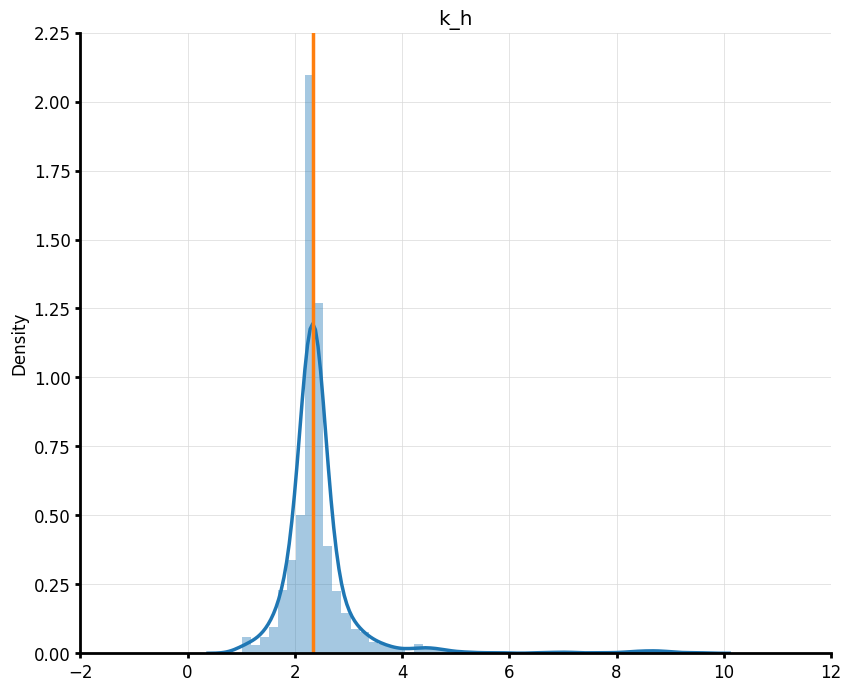

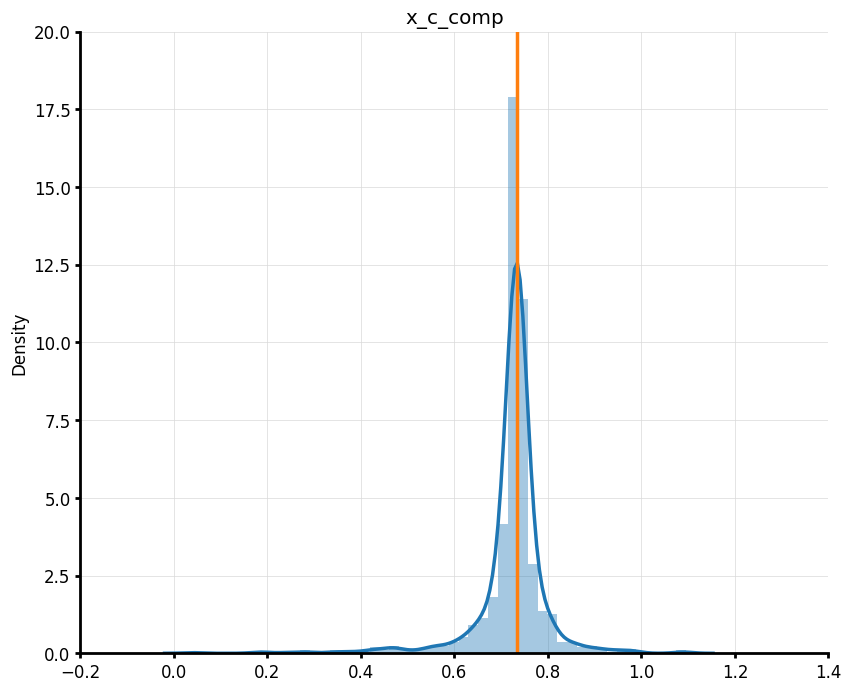

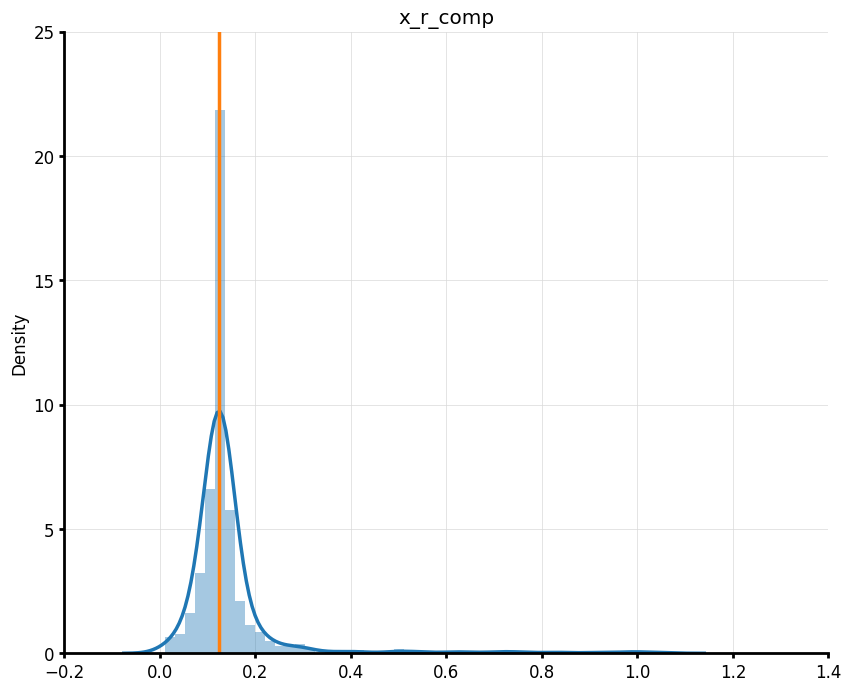

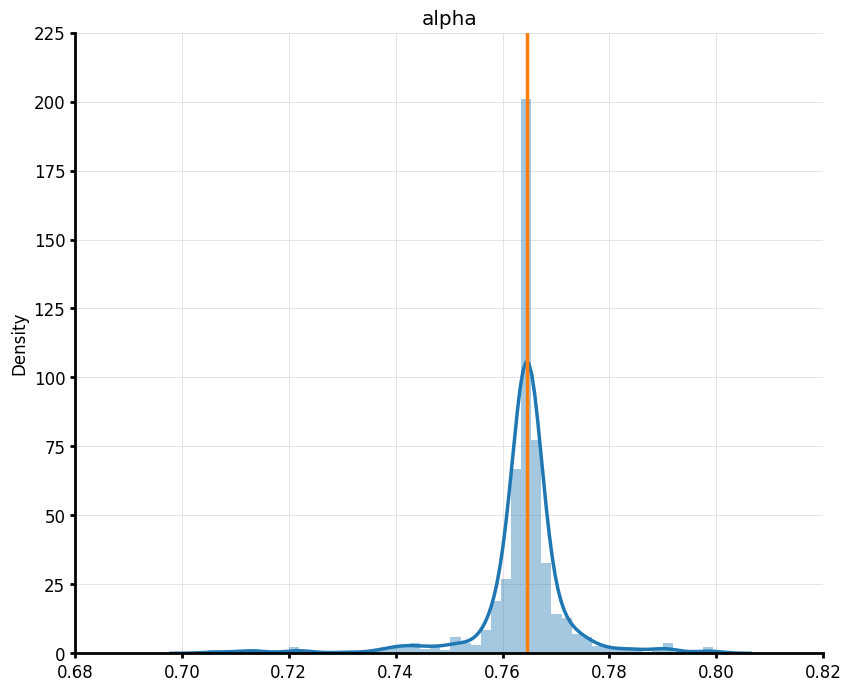

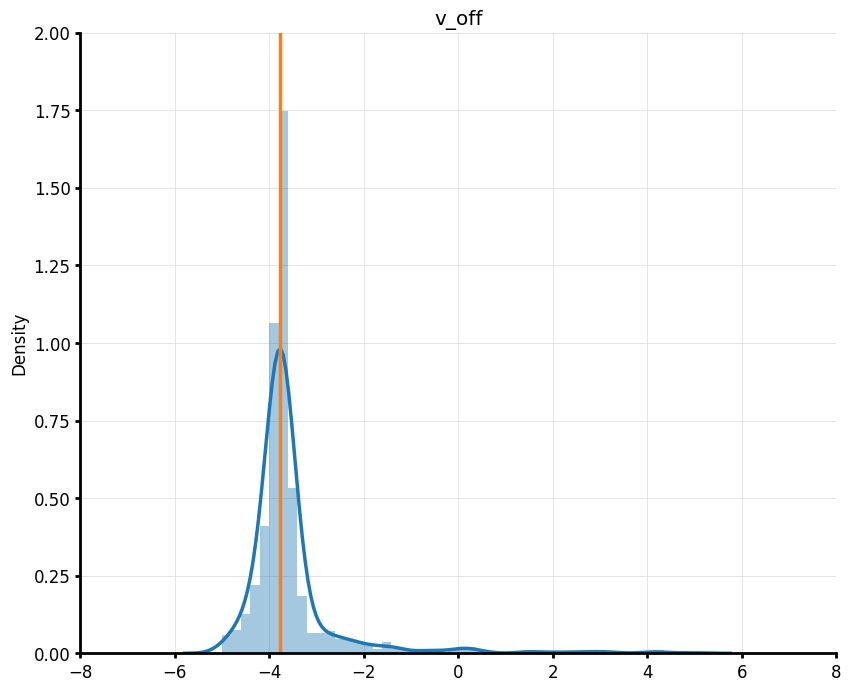

In [71]:
gammas = np.zeros_like(config['runtime']['gammas'])
gammas+=0.3
gammas[20:22]+=1.2
gammas[22:24]+=0.2
gammas[24:26]=0.15
gammas[26] = 0.05
gammas[27] = 0.5

ga_optim = GA(SolModel,
              config['runtime']['bounds'],
              #config['runtime']['gammas'],
              gammas,
              config['runtime']['mask_multipliers'],
              crossover_rate=0
              )
sol = ga_optim.generate_solution()
print('gammas = ',gammas)
for k in range(20):
    genes_initial = sol.x
    genes_transformed = ga_optim._transform_genes(genes_initial)
    bounds_transformed = ga_optim._bounds_transformed

    result = []
    for _ in range(1000):
        genes_mutated = cauchy_mutation(genes=genes_transformed,
                                        bounds=bounds_transformed, gamma = 0.3,
                                        )

        genes = ga_optim._transform_genes_back(np.asfarray(genes_mutated))
        result.append(genes[k])

    result = np.asfarray(result)
    plt.figure()
    sns.distplot(np.log10(result))
    plt.axvline(np.log10(genes_initial[k]), color='C1')
    plt.title(C.T.columns[k])

for k in range(20,28):
    genes_initial = sol.x
    genes_transformed = ga_optim._transform_genes(genes_initial)
    bounds_transformed = ga_optim._bounds_transformed

    result = []
    for _ in range(1000):
        genes_mutated = cauchy_mutation(genes=genes_transformed,
                                        bounds=bounds_transformed, gamma = gammas,
                                        )

        genes = ga_optim._transform_genes_back(np.asfarray(genes_mutated))
        result.append(genes[k])

    result = np.asfarray(result)
    plt.figure()
    sns.distplot(result)
    plt.axvline(genes_initial[k], color='C1')
    plt.title(C.T.columns[k])

In [ ]:
sns.distplot(np.log10(result))

In [91]:
0.15*np.log10(0.8/0.7)/2

0.004349396023326511

In [147]:
(0.01-1.1)*0.15/2

-0.08175

In [ ]:
for k in range(24,26):
    genes_initial = sol.x
    genes_transformed = ga_optim._transform_genes(genes_initial)
    bounds_transformed = ga_optim._bounds_transformed

    result = []
    for _ in range(256*1000):
        genes_mutated = cauchy_mutation(genes=genes_transformed,
                                        bounds=bounds_transformed, gamma=1
                                        )

        genes = ga_optim._transform_genes_back(np.asfarray(genes_mutated))
        result.append(genes[k])

    result = np.asfarray(result)
    plt.figure()
    sns.distplot(result)
    plt.axvline(genes_initial[k], color='C1')
    plt.title(C.T.columns[k])

/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


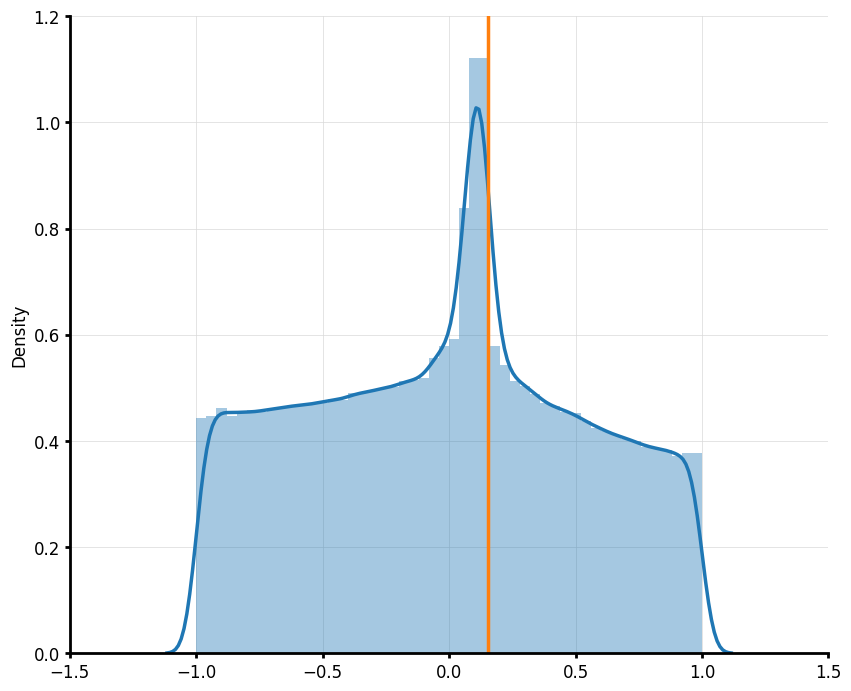

In [103]:
sns.distplot(np.log10(dump_genes[m_index[18]].values))
plt.axvline(np.log10(genes_initial[18][]), color='C1')

In [287]:
np.log10(2) / 2

0.1505149978319906

In [121]:
min(result['dump']['dump']['loss'])

54.789582287804635

In [69]:
generations = np.arange(n_generations)

In [114]:
len(result['dump']['dump']['loss'] )

256000

No handles with labels found to put in legend.


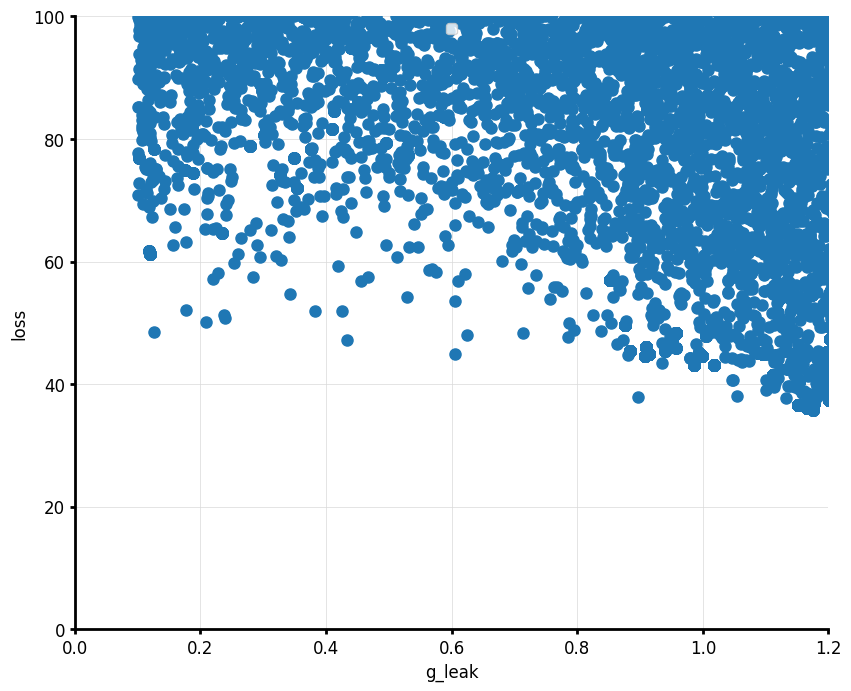

In [28]:
plt.scatter(result['dump']['dump']['genes'][18::28],result['dump']['dump']['loss'] )
plt.xlabel('g_leak')
plt.ylabel('loss')
plt.xlim(0, 1.2)
plt.ylim(0,100)
plt.legend()

In [43]:
np.argmin([0,4,5,7,-4,6])

4

In [40]:
np.argmin(result['dump']['dump']['loss'])

516352

In [45]:
result['dump']['dump']['genes'][516352*28:516353*28]

array([ 1.34633828,  1.49466779,  1.4999685 ,  0.18763356,  2.1855166 ,
        6.2008298 ,  0.67232776,  1.74507783,  3.15547882,  5.66792144,
        0.2523999 ,  0.36026433,  7.60552299,  0.71383154,  9.60562864,
        0.94472885,  0.60526993,  0.42705179,  1.1756699 ,  0.73861598,
       18.87910666, 84.60656491,  7.84802032,  5.4187408 ,  0.2459412 ,
        1.05395393,  0.74624064, -1.11602572])

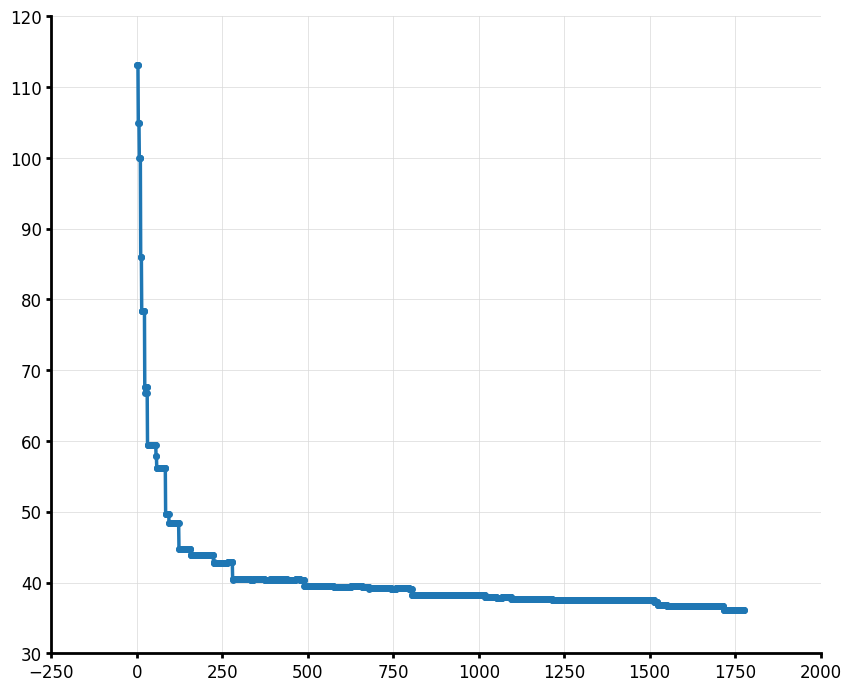

In [29]:
loss = result['dump']['best']['loss']
plt.plot(loss, '.-')

In [181]:
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])

In [6]:
dump_genes = pd.DataFrame(result['dump']['best']['genes'].reshape(-1, len(sol_best)),
                          columns=config['runtime']['m_index'])
dump_genes

ec_name    common                                                              \
g_name        c_p       c_m      a0_m      b0_m   delta_m       s_m      a0_h   
0        2.712636  1.437426  7.142779  1.297278  0.147010  9.153935  0.313558   
1        2.143079  0.657524  0.137916  1.596391  0.135275  0.210106  0.878753   
2        1.980064  0.996654  1.331436  0.561677  0.872399  8.560956  7.069579   
3        0.887618  1.178727  8.328126  0.828315  0.528280  1.015576  1.581469   
4        0.321870  0.137553  4.695198  0.860543  0.146726  0.827364  0.849616   
..            ...       ...       ...       ...       ...       ...       ...   
995      3.653771  1.691761  2.183544  0.923361  0.647492  4.952795  9.828578   
996      3.653771  1.691761  2.183544  0.923361  0.647492  4.952795  9.828578   
997      3.653771  1.691761  2.183544  0.923361  0.647492  4.952795  9.828578   
998      3.653771  1.691761  2.183544  0.923361  0.647492  4.952795  9.828578   
999      3.653771  1.691761  2.183544  0.923361  0.647492  4.952795  9.828578   

ec_name                                ...                                 \
g_name       b0_h   delta_h       s_h  ...    g_leak     tau_z   v_half_m   
0        9.569424  0.139441  1.617657  ...  0.524836  9.288269  42.690681   
1        0.318973  6.970755  1.468552  ...  0.152738  1.394332  29.545071   
2        2.662300  2.291996  0.258573  ...  0.286449  2.263612  12.554645   
3        0.680711  1.056069  5.412427  ...  0.198023  2.275623  33.003837   
4        0.431725  0.522538  0.139873  ...  1.084333  0.122278  19.077863   
..            ...       ...       ...  ...       ...       ...        ...   
995      1.099444  0.602708  8.976248  ...  0.119862  0.948702  23.882189   
996      1.099444  0.602708  8.976248  ...  0.119862  0.948702  23.882189   
997      1.099444  0.602708  8.976248  ...  0.119862  0.948702  23.882189   
998      1.099444  0.602708  8.976248  ...  0.119862  0.948702  23.882189   
999      1.099444  0.602708  8.976248  ...  0.119862  0.948702  23.882189   

ec_name                                                                  trace  
g_name    v_half_h       k_m       k_h  x_c_comp  x_r_comp     alpha     v_off  
0        89.835970  1.647097  9.425208  0.243087  1.066034  0.707574 -0.644164  
1        91.958472  5.711386  7.593682  0.136157  0.631567  0.709505 -3.819244  
2        60.266624  8.443513  3.797159  0.040347  0.451179  0.765736  4.963641  
3        97.937405  2.026019  5.444050  0.326285  1.042425  0.794784 -0.317164  
4        75.054319  1.879595  5.394996  0.321000  0.931918  0.775726  1.242824  
..             ...       ...       ...       ...       ...       ...       ...  
995      83.186072  5.042149  3.179943  0.157672  1.036790  0.795904 -3.450192  
996      83.186072  5.042149  3.179943  0.157672  1.036790  0.795904 -3.450192  
997      83.186072  5.042149  3.179943  0.157672  1.036790  0.795904 -3.450192  
998      83.186072  5.042149  3.179943  0.157672  1.036790  0.795904 -3.450192  
999      83.186072  5.042149  3.179943  0.157672  1.036790  0.795904 -3.450192  

[1000 rows x 28 columns]

No handles with labels found to put in legend.


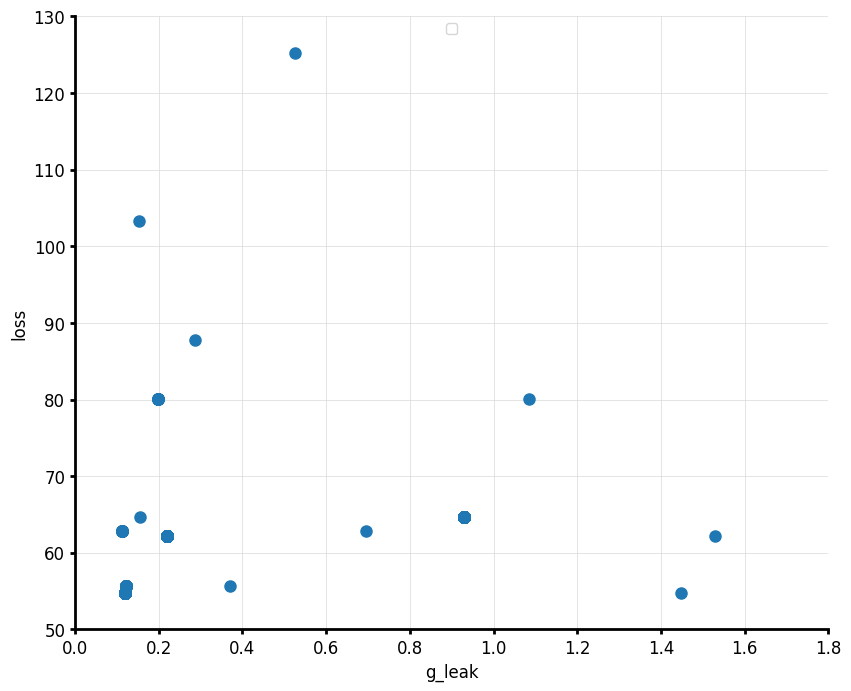

In [51]:
plt.scatter(dump_genes['common']['g_leak'],loss)
plt.ylabel('loss')
plt.xlabel('g_leak')
plt.legend()

# Recreate solution

In [128]:
sys.path.append('src/model')
from ina_model import InaModel
from solmodel import SolModel

In [93]:
C.T.columns


Index(['c_p', 'c_m', 'a0_m', 'b0_m', 'delta_m', 's_m', 'a0_h', 'b0_h',
       'delta_h', 's_h', 'a0_j', 'b0_j', 'delta_j', 's_j', 'tau_j_const', 'R',
       'R_f', 'g_max', 'g_leak', 'tau_z', 'v_half_m', 'v_half_h', 'k_m', 'k_h',
       'x_c_comp', 'x_r_comp', 'alpha', 'v_off', 'v_rev', 'v_c'],
      dtype='object', name='name')

In [131]:
sol_best['common']['g_leak'] =1

In [217]:
sol_best1 = sol_best.copy()
sol_best1

ec_name  g_name     
common   c_p             3.653771
         c_m             1.691761
         a0_m            2.183544
         b0_m            0.923361
         delta_m         0.647492
         s_m             4.952795
         a0_h            9.828578
         b0_h            1.099444
         delta_h         0.602708
         s_h             8.976248
         a0_j            0.625575
         b0_j            0.147311
         delta_j         0.811035
         s_j             1.034767
         tau_j_const     1.282862
         R               1.070311
         R_f             2.210616
         g_max           9.539465
         g_leak          1.000000
         tau_z           0.948702
         v_half_m       23.882189
         v_half_h       83.186072
         k_m             5.042149
         k_h             3.179943
         x_c_comp        0.157672
         x_r_comp        1.036790
         alpha           0.795904
trace    v_off          -3.450192
Name: 0, dtype: float64

In [218]:
filename_so = "../../src/model_ctypes/ina/ina.so"
model = InaModel(filename_so)

SolModel.model = model
SolModel.config = config.copy()

sol1 = SolModel(x=sol_best1)

In [219]:
sol1.update()

In [220]:
sol1

Solution = {
    x    = [ 3.65377139  1.69176147  2.18354378  0.92336088  0.64749167  4.95279517
  9.82857755  1.09944428  0.60270808  8.976248    0.62557459  0.14731148
  0.81103489  1.03476724  1.28286178  1.07031084  2.21061617  9.53946537
  1.          0.94870198 23.88218885 83.18607195  5.04214908  3.17994292
  0.15767247  1.03679045  0.79590419 -3.45019206],
    y    = 50.65676940517711,
    data = {'phenotype': {'trace': name   v_comp   v_p        v_m         m         h         j      I_out
0       -80.0 -80.0 -82.391494  0.000009  0.438397  0.437855 -39.650437
1       -80.0 -80.0 -82.391494  0.000009  0.438397  0.437855 -39.650437
2       -80.0 -80.0 -82.391494  0.000009  0.438396  0.437855 -39.650437
3       -80.0 -80.0 -82.391494  0.000009  0.438396  0.437855 -39.650437
4       -80.0 -80.0 -82.391494  0.000009  0.438396  0.437855 -39.650437
...       ...   ...        ...       ...       ...       ...        ...
99995   -80.0 -80.0 -82.391494  0.000009  0.110793  0.437855 -39

In [221]:
I_best = sol1['phenotype']['trace']['I_out']

In [222]:
I = config['experimental_conditions']['trace']['phenotype']['I_out']
RMSE(I_best, I)

50.65676940517711

In [184]:
I = config['experimental_conditions']['trace']['phenotype']['I_out']
RMSE(I_best, I)

50.65676940517711

In [82]:
art_data = pd.read_csv('../../data/training/artificial_data.csv').I_out

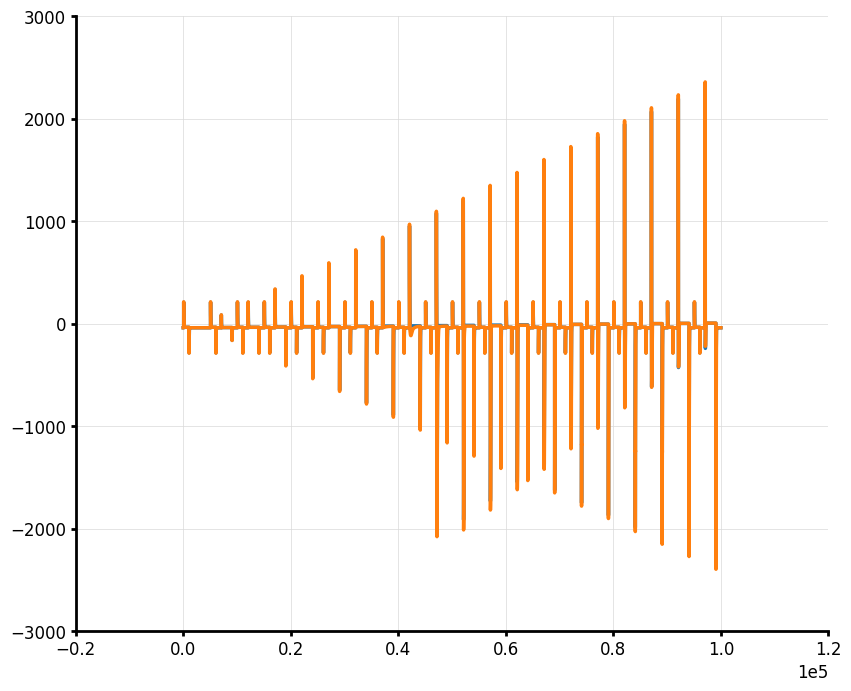

In [83]:
plt.plot(sol['phenotype']['trace']['I_out'])
plt.plot(art_data)

<ipython-input-86-eec4793ef5e1>:43: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


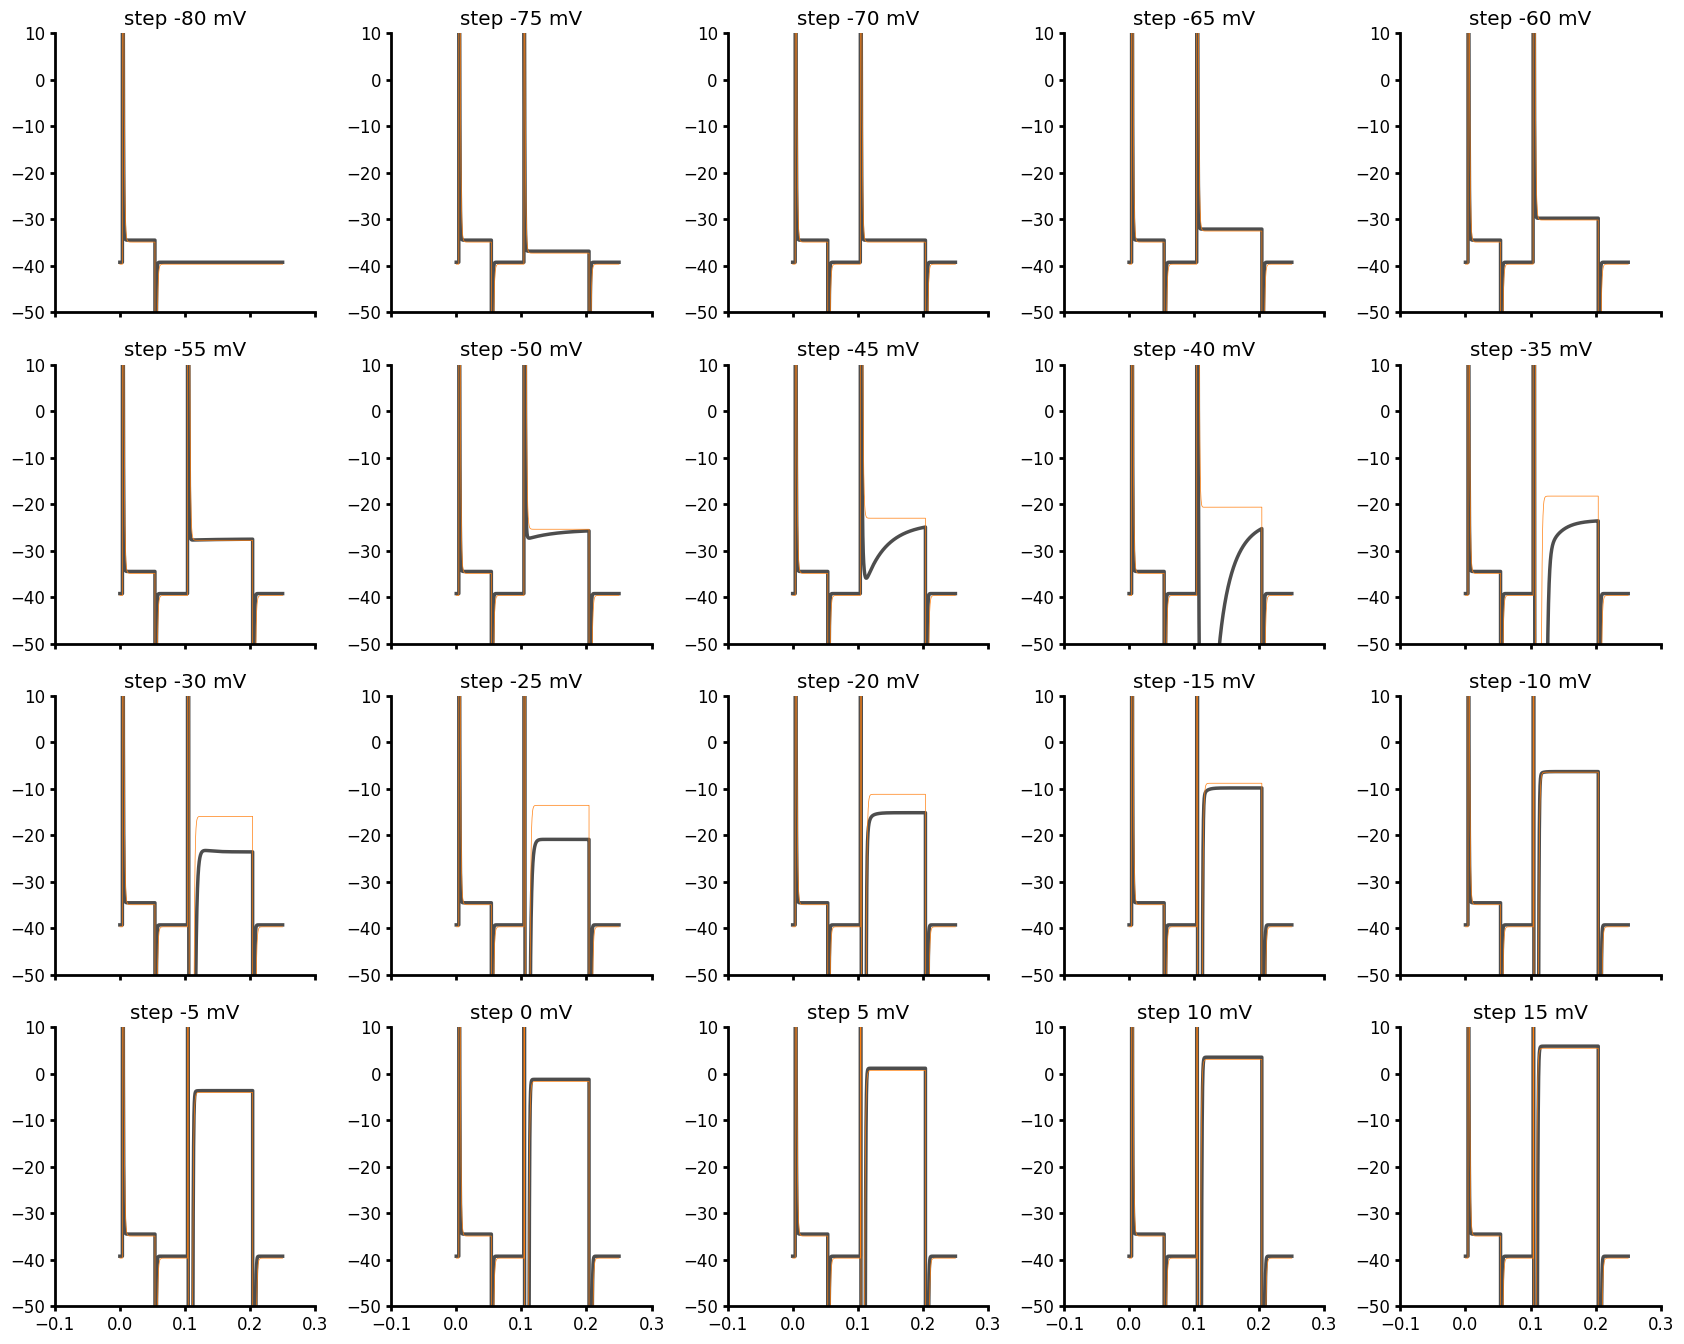

In [86]:
    I_out = sol['phenotype']['trace']['I_out']
    real_data_all = art_data
    n_sections = 20
    split_indices = np.linspace(0, len(real_data_all), n_sections + 1).astype(int)

    nrows, ncols = 4, 5

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

    
    dt = 5e-5

    colors = ['0.3', 'C1']

    i_global = 0

    for i_row in range(nrows):
        for i_col in range(ncols):
            ax = axes[i_row, i_col]
            plt.sca(ax)

            i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
            slice_current = slice(i_start, i_end)

            I_out_current = I_out[slice_current]
            data_current  = real_data_all[slice_current]
            t = np.arange(len(data_current)) * dt

            plt.plot(t, data_current, color=colors[0])
            plt.plot(t, I_out_current, lw=0.5, color=colors[1])

            plt.grid()

            step_value = -80 + 5 * i_global
            title = f'step {step_value} mV'
            plt.title(title)

            i_global += 1
            plt.ylim(-50,10)
            
    plt.tight_layout()
    
    
    
    #folder_save = "../../pictures/results/"
    #filename_prefix = ar[k].split('.')[0]
    #plt.title(filename_prefix)
    #plt.show()
    
    #filename_save = os.path.join(folder_save, f'{filename_prefix}_grid.png')
    filename_save = '../../pictures/results/art_data_n_256_best_16_epochs_1000_leak_1.png'
    plt.savefig(filename_save, dpi=300)

In [33]:
dump_genes.iloc[-1]

ec_name  g_name     
common   c_p             3.653771
         c_m             1.691761
         a0_m            2.183544
         b0_m            0.923361
         delta_m         0.647492
         s_m             4.952795
         a0_h            9.828578
         b0_h            1.099444
         delta_h         0.602708
         s_h             8.976248
         a0_j            0.625575
         b0_j            0.147311
         delta_j         0.811035
         s_j             1.034767
         tau_j_const     1.282862
         R               1.070311
         R_f             2.210616
         g_max           9.539465
         g_leak          0.119862
         tau_z           0.948702
         v_half_m       23.882189
         v_half_h       83.186072
         k_m             5.042149
         k_h             3.179943
         x_c_comp        0.157672
         x_r_comp        1.036790
         alpha           0.795904
trace    v_off          -3.450192
Name: 999, dtype: float64

In [137]:
pypoptim.helpers

NameError: name 'pypoptim' is not defined